# Explicación de redes recurrentes

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

En este notebook explica los conceptos relacionados con redes recurrentes.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````


In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
np.__version__

'2.0.2'

# Modelo simple

## Datos de entrada

In [ ]:
# Datos de entrada (texto y etiquetas)
frases = [
    "Me encanta este producto",
    "Odio este lugar",
    "Qué gran experiencia",
    "Muy mala atención",
    "Volveré sin duda",
    "No lo recomiendo"
]
etiquetas = [1, 0, 1, 0, 1, 0]  # 1 = positivo, 0 = negativo

## Tokenización

✅ Consiste en convertir texto en secuencia de enteros

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(frases)
secuencias = tokenizer.texts_to_sequences(frases)

In [ ]:
secuencias

[[3, 4, 2, 5], [6, 2, 7], [8, 9, 10], [11, 12, 13], [14, 15, 16], [17, 18, 19]]

In [ ]:
print(tokenizer.word_index)

{'<OOV>': 1, 'este': 2, 'me': 3, 'encanta': 4, 'producto': 5, 'odio': 6, 'lugar': 7, 'qué': 8, 'gran': 9, 'experiencia': 10, 'muy': 11, 'mala': 12, 'atención': 13, 'volveré': 14, 'sin': 15, 'duda': 16, 'no': 17, 'lo': 18, 'recomiendo': 19}


In [ ]:
tokenizer.word_counts

OrderedDict([('me', 1),
             ('encanta', 1),
             ('este', 2),
             ('producto', 1),
             ('odio', 1),
             ('lugar', 1),
             ('qué', 1),
             ('gran', 1),
             ('experiencia', 1),
             ('muy', 1),
             ('mala', 1),
             ('atención', 1),
             ('volveré', 1),
             ('sin', 1),
             ('duda', 1),
             ('no', 1),
             ('lo', 1),
             ('recomiendo', 1)])

❓ **¿Qué representa el argumento `oov_token`?**

Primero OOV significa `Out-of-vocabulatory`

Al utilizarlo se evitan errores en la inferencia con palabras nuevas permitiendo, así, que todas las entradas tengan una representación válida.

## Vectorización

✅ Forma en la que el texto se transforma en tensores para el modelo

In [ ]:
# padding para igualar largo
X = tf.keras.preprocessing.sequence.pad_sequences(secuencias, padding='post')
print("Secuencias tokenizadas y vectorizadas:")
print(X)

Secuencias tokenizadas y vectorizadas:
[[ 3  4  2  5]
 [ 6  2  7  0]
 [ 8  9 10  0]
 [11 12 13  0]
 [14 15 16  0]
 [17 18 19  0]]


In [ ]:
X = np.array(X, dtype=np.int32)
etiquetas = np.array(etiquetas, dtype=np.float32)

In [ ]:
etiquetas.shape

(6,)

## Conceptos preliminares

+ Capa `Embedding`: cada entero (palabra) se convierte en un vector denso entrenable

+ Capa `SpatialDropout1D`: apaga vectores completos (no valores individuales) para mejorar la generalización, es el mismo conceptos de regularización revisado en las redes anteriores.

+ Capa `GlobalPooling`: resume la información por frase en un solo vector (promedio)



## 🧠 `Vector denso entrenable`

### Definición
Es una representación numérica (vector) que el modelo aprende y ajusta durante el entrenamiento, de forma que contenga la información útil sobre un objeto en un espacio de dimensiones reducidas.

### Analogía

Imagine que se quiere representar la palabra "amor". Dado que las redes no entienden texto, la palabra no se puede entregar a una red neuronal.

Entonces, antes la palabra se representa como un **vector aleatorio**, por ejemplo:

````
"amor" -> [0.12, -0.07, 0.31, 0.05, 0.91]
````

Después del entrenamiento, el modelo va **ajustando** los valores del vector para que reflejen de mejor forma el **significado y el uso** de la palabra según el problema.

Si "amor" aparece en contextos positivos, su vector se va acercando al de palabras como "alegría" o "felicidad".

Si "odio" aparece en contextos opuestos, su vector se "aleja" del de "amor"

❓ **¿Por qué denso?**

Porque todos los elementos del vector tienen valores numéricos reales (a diferencia de vectores dispersos como lo es one-hot encoding donde sólo hay un 1 y muchos ceros.

El vector tiene una dimensión pequeña, sin embargo, captura mucho significado.

❓ **¿Por qué entrenable?**

Porque estos vectores no son fijos: se actualzian automáticamente junto con los pesos del modelo para mejorar su desempeño en una tarea.


*Un vector denso entrenable es como un "perfil de significado" que el moelo le da a una palabra y que se va puliendo a medida que aprende.*


## Creación de la red

In [ ]:
modelo = tf.keras.models.Sequential(name="red_simple")
modelo.add(tf.keras.Input(shape=(X.shape[1],)))
modelo.add(tf.keras.layers.Embedding(input_dim=1000, output_dim=8, name="Capa_Embedding"))  # capa de embedding
modelo.add(tf.keras.layers.SpatialDropout1D(0.2, name="Capa_Dropout"))                    # regularización
modelo.add(tf.keras.layers.GlobalAveragePooling1D(name="Capa_Pooling"))                 # reduce dimensiones
modelo.add(tf.keras.layers.Dense(1, activation='sigmoid', name="Capa_Salida"))           # salida binaria

# Muestra la arquitectura de la red
modelo.summary()

Model: "red_simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_Embedding (Embedding)      │ (None, 4, 8)           │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Dropout (SpatialDropout1D) │ (None, 4, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Pooling                    │ (None, 8)              │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Salida (Dense)             │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,009 (31.29 KB)

 Trainable params: 8,009 (31.29 KB)

 Non-trainable params: 0 (0.00 B)

## Compila la red

In [ ]:
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Entrenar la red

In [ ]:
history = modelo.fit(X, etiquetas, epochs=10, verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.6990
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.3333 - loss: 0.6936
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5000 - loss: 0.6914
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8333 - loss: 0.6858
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 0.6899
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5000 - loss: 0.6912
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8333 - loss: 0.6854
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8333 - loss: 0.6853
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8333 - loss: 0.6842
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8333 - loss: 0.6854


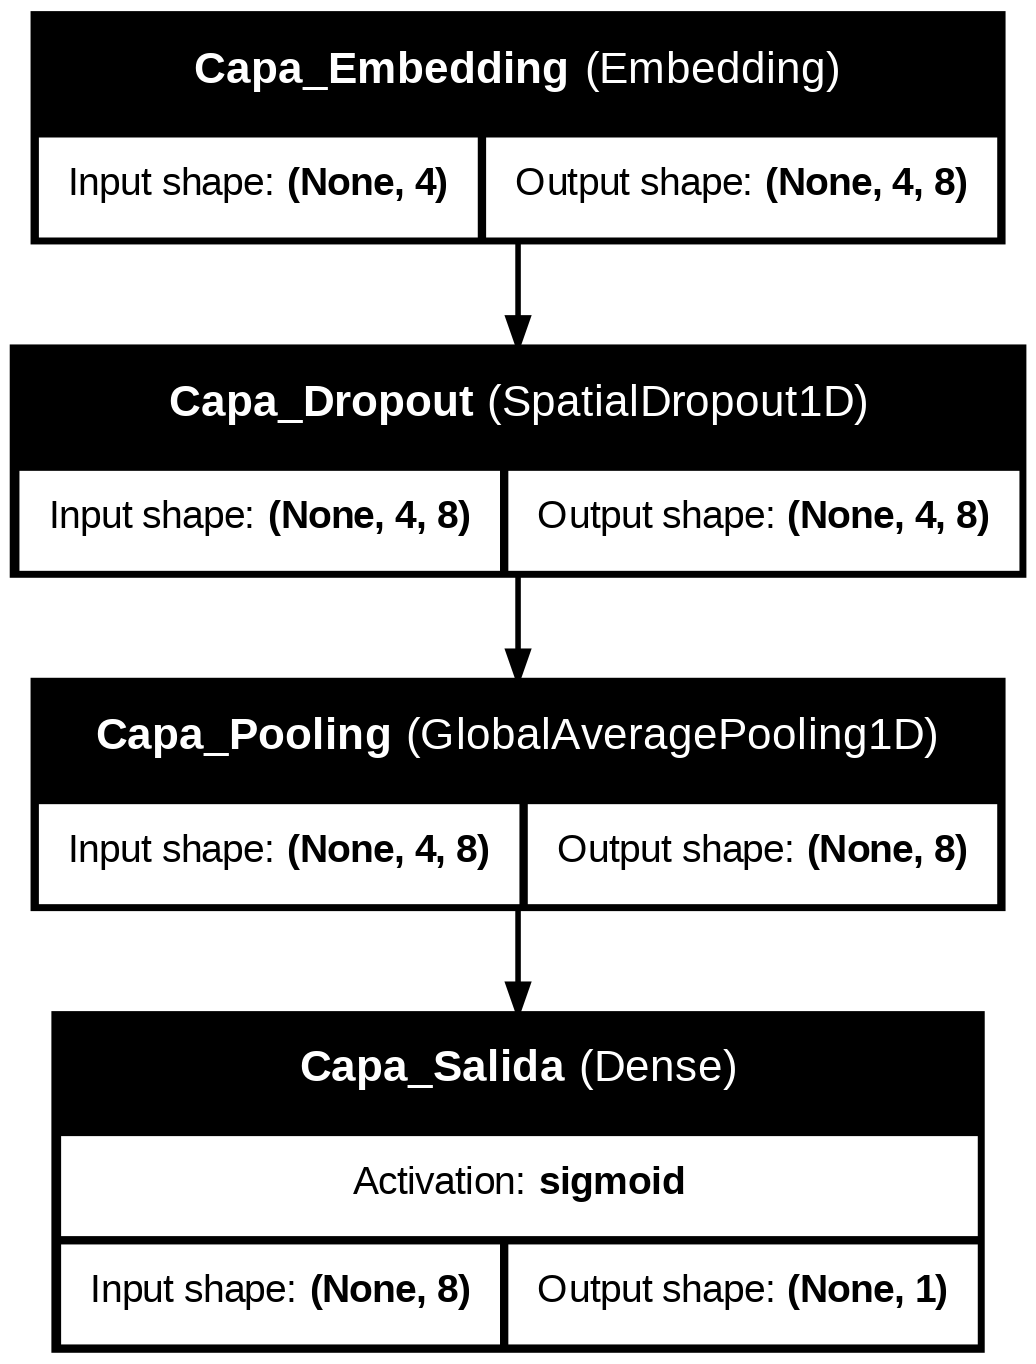

In [ ]:
tf.keras.utils.plot_model(modelo, show_shapes=True, show_layer_names=True,
           show_layer_activations=True, to_file="modelo_simple.png")

# Modelo bidireccional

Agregar una capa `Bidirectional` implica el uso de  redes recurrentes (RNN) que procesan secuencias en ambas direcciones (hacia adelante y hacia atrás), lo que mejora la comprensión del contexto.

La capa `Bidirectional` se usa alrededor de una capa recurrente que puede ser `LSTM` o `GRU`

🧠 **¿Qué aporta `Bidirectional`?**

+ **LSTM normal**: procesa una frase de izquierda a derecha.

+ **Bidirectional (LSTM): también recorre de derecha a izquierda, eso ayuda a entender mejor el contexto.

🧠 **¿Cuándo es útil usar `Bidirectional`?**

+ El significado depende del contexto, como en *no está mal*
+ La posición de la palabra importa

In [ ]:
# Modelo con Bidirectional
modelo_b = tf.keras.models.Sequential(name="Red_Bidireccional")
modelo_b.add(tf.keras.Input(shape=(X.shape[1],)))
modelo_b.add(tf.keras.layers.Embedding(input_dim=1000, output_dim=16, name="Capa_Embedding"))
modelo_b.add(tf.keras.layers.SpatialDropout1D(0.2, name="Capa_Dropout"))
modelo_b.add(tf.keras.layers.Bidirectional(LSTM(16, name="Capa_Bidireccional")))  # procesa en ambas direcciones
modelo_b.add(tf.keras.layers.Dense(1, activation='sigmoid', name="Capa_Salida"))

modelo_b.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo_b.summary()

# Entrenamiento
history_b = modelo_b.fit(X, etiquetas, epochs=10, verbose=1)


Model: "Red_Bidireccional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_Embedding (Embedding)      │ (None, 4, 16)          │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Dropout (SpatialDropout1D) │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 32)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Salida (Dense)             │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,257 (79.13 KB)

 Trainable params: 20,257 (79.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3333 - loss: 0.6934
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3333 - loss: 0.6936
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3333 - loss: 0.6932
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6667 - loss: 0.6924
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6667 - loss: 0.6912
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6667 - loss: 0.6889
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8333 - loss: 0.6891
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6667 - loss: 0.6885
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.6870
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8333 - loss: 0.6883


In [ ]:
twt = ['Mi recomendación es que no lo compre']
twt = tokenizer.texts_to_sequences(twt)
twt = tf.keras.preprocessing.sequence.pad_sequences(twt, maxlen=X.shape[1], dtype='int32', value=0)

In [ ]:
sentiment = modelo.predict(twt, batch_size=1)[0]
print(sentiment)

print("Negativo" if np.argmax(sentiment) == 0 else "Positivo")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[0.502694]
Negativo


In [ ]:
sentiment = modelo_b.predict(twt, batch_size=1)[0]
print(sentiment)

print("Negativo" if np.argmax(sentiment) == 0 else "Positivo")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
[0.49898574]
Negativo
